In [2]:
# importing necessary packages for the section
import os
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

In [3]:
# Our hearing range is commonly 20 Hz to 20 kHz
# Starting with 55 Hz which is "A" (I divided 440 by 2 three times)
curr_freq = 55
freq_list = []

# I want to calculate 8 octaves of notes. Each octave has 12 notes. Looping for 96 steps:
for i in range(96): 
    freq_list.append(curr_freq)
    curr_freq *= np.power(2, 1/12) # Multiplying by 2^(1/12)

#reshaping and creating dataframe
freq_array = np.reshape(np.round(freq_list,1), (8, 12))
cols = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
df_note_freqs = pd.DataFrame(freq_array, columns=cols)
print("NOTE FREQUENCIES IN WESTERN MUSIC")
df_note_freqs.head(10)

NOTE FREQUENCIES IN WESTERN MUSIC


,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,55.0,58.3,61.7,65.4,69.3,73.4,77.8,82.4,87.3,92.5,98.0,103.8
1,110.0,116.5,123.5,130.8,138.6,146.8,155.6,164.8,174.6,185.0,196.0,207.7
2,220.0,233.1,246.9,261.6,277.2,293.7,311.1,329.6,349.2,370.0,392.0,415.3
3,440.0,466.2,493.9,523.3,554.4,587.3,622.3,659.3,698.5,740.0,784.0,830.6
4,880.0,932.3,987.8,1046.5,1108.7,1174.7,1244.5,1318.5,1396.9,1480.0,1568.0,1661.2
5,1760.0,1864.7,1975.5,2093.0,2217.5,2349.3,2489.0,2637.0,2793.8,2960.0,3136.0,3322.4
6,3520.0,3729.3,3951.1,4186.0,4434.9,4698.6,4978.0,5274.0,5587.7,5919.9,6271.9,6644.9
7,7040.0,7458.6,7902.1,8372.0,8869.8,9397.3,9956.1,10548.1,11175.3,11839.8,12543.9,13289.8


In [5]:
path_1 = "../input/musical-instrument-chord-classification/Audio_Files/Major/Major_0.wav"
path_2 = "../input/musical-instrument-chord-classification/Audio_Files/Minor/Minor_169.wav"
path_3 = "../input/musical-instrument-chord-classification/Audio_Files/Major/Major_111.wav"
IPython.display.Audio(path_1, rate = 44100

In [6]:
IPython.display.Audio(path_2, rate = 44100)

In [7]:
IPython.display.Audio(path_3, rate = 44100)

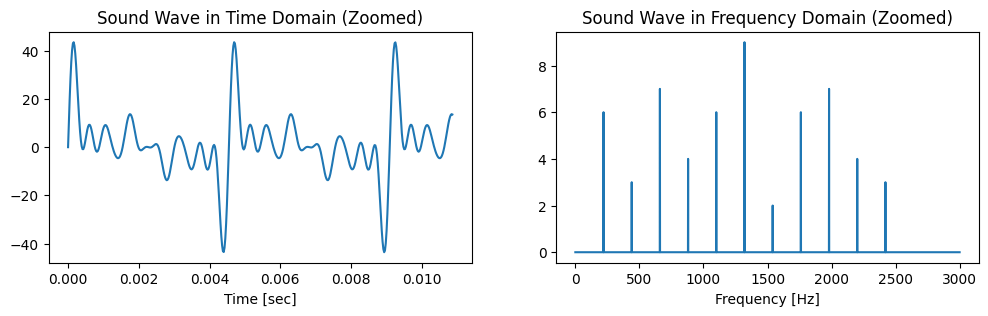

In [8]:
freq = 220 # note frequency
fs = 44100 # sampling rate
duration = 1 # duration of a signal [seconds]
time = np.linspace(0, duration, fs*duration, endpoint=False) # array for time stamps

# Creating signal in time domain
np.random.seed(42)
signal = np.zeros(len(time))
for i in range(1,12):
    amp = np.random.randint(0,10) # using random numbers for amplitudes
    current_freq = i*freq # current harmonic
    signal += amp*np.sin(2 * np.pi * current_freq * time)

# Fourier Transform
N = len(signal)
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Displaying audio
IPython.display.display(IPython.display.Audio(data=signal, rate=44100))

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(time[:480], signal[:480])
axes[0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[0].set(xlabel='Time [sec]')
axes[1].plot(y_freq[:3000], signal_f_onesided[:3000])
axes[1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1].set(xlabel='Frequency [Hz]')
plt.show()

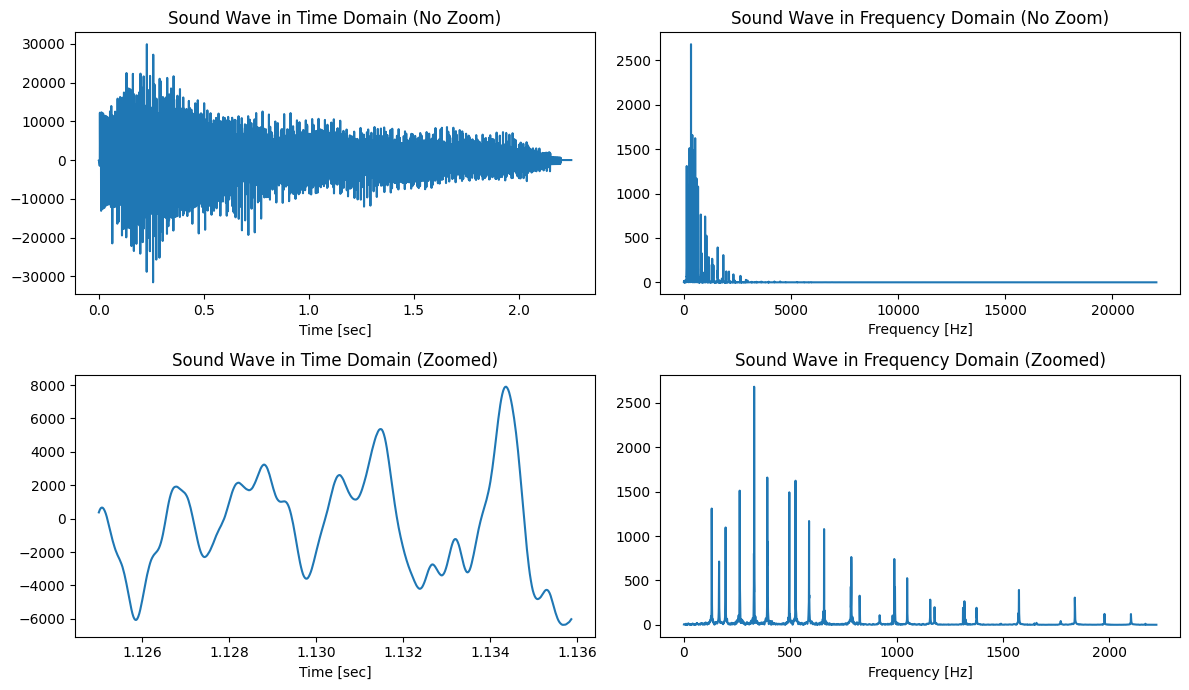

In [9]:
path = "../input/musical-instrument-chord-classification/Audio_Files/Major/Major_0.wav"
fs, signal = wavfile.read(path)
N = len(signal)
time = np.linspace(0., N/fs, N)

# Fourier Transform
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0,0].plot(time, signal)
axes[0,0].set_title("Sound Wave in Time Domain (No Zoom)")
axes[0,0].set(xlabel='Time [sec]')
axes[0,1].plot(y_freq, signal_f_onesided)
axes[0,1].set_title("Sound Wave in Frequency Domain (No Zoom)")
axes[0,1].set(xlabel='Frequency [Hz]')
axes[1,0].plot(time[(N//2):(N//2+480)], signal[(N//2):(N//2+480)])
axes[1,0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[1,0].set(xlabel='Time [sec]')
axes[1,1].plot(y_freq[:5000], signal_f_onesided[:5000])
axes[1,1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1,1].set(xlabel='Frequency [Hz]')
fig.tight_layout()
plt.show()

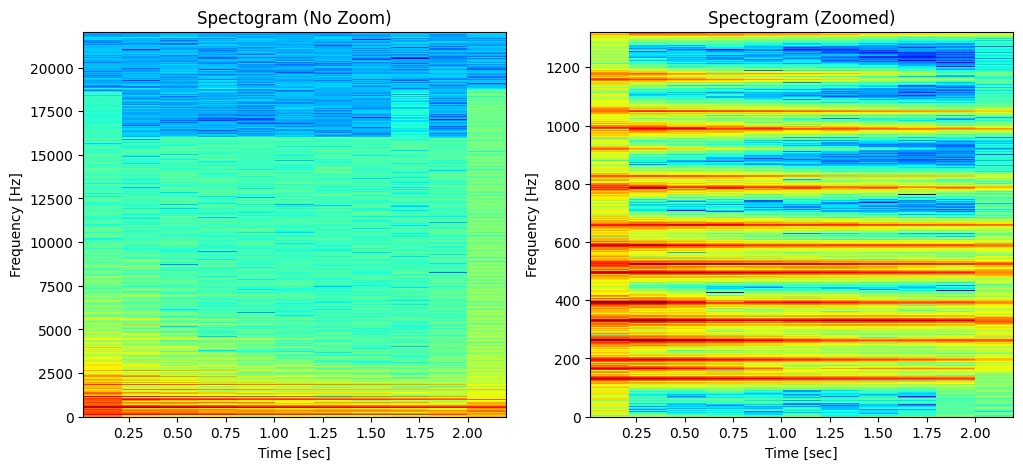

In [10]:
# applying spectrogram
f, t, Sxx = spectrogram(signal, fs, nperseg=10000, nfft = 50000)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].pcolormesh(t, f, np.log(Sxx), cmap="jet")
axes[0].set_title("Spectogram (No Zoom)")
axes[0].set(xlabel='Time [sec]', ylabel='Frequency [Hz]')
axes[1].pcolormesh(t, f[:1500], np.log(Sxx)[:1500,:], cmap="jet")
axes[1].set_title("Spectogram (Zoomed)")
axes[1].set(xlabel='Time [sec]', ylabel='Frequency [Hz]')
plt.show()

Harmonics: [ 131.  165.  196.  262.  330.  392.  496.  525.  588.  659.  787.  826.
  989. 1050. 1158. 1179. 1312. 1319. 1376. 1576. 1838.]


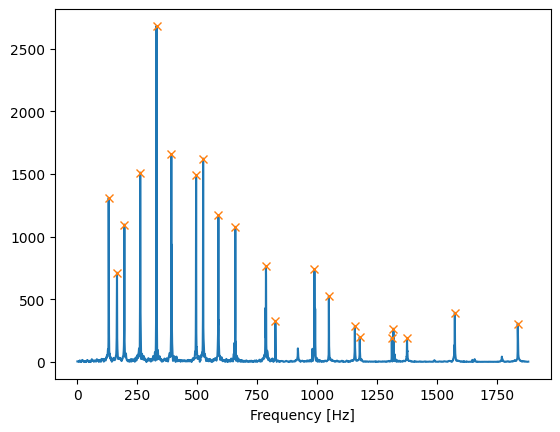

In [11]:
# h: height threshold. I defined as %5 of max value
h = signal_f_onesided.max()*5/100
peaks, _ = find_peaks(signal_f_onesided, distance=10, height = h)

freq_50_index = np.abs(y_freq - 50).argmin() # finding index for 50 Hz
peaks = peaks[peaks>freq_50_index] # filtering peaks less than 50 Hz
harmonics = y_freq[peaks]
print("Harmonics: {}".format(np.round(harmonics)))

# Plot
i = peaks.max() + 100
plt.plot(y_freq[:i], signal_f_onesided[:i])
plt.plot(y_freq[peaks], signal_f_onesided[peaks], "x")
plt.xlabel('Frequency [Hz]')
plt.show()

In [12]:
# I would like to create a method so that I can use in the next section
# The method will read sound file, apply Fourier, find peak frequencies and return
# Input: path of the sound file
# Output: Frequency peaks
# print_peaks = true to plot peaks

def find_harmonics(path, print_peaks=False):
    fs, X = wavfile.read(path)
    N = len(X)
    X_F = fft(X)
    X_F_onesided = 2.0/N * np.abs(X_F[0:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    freqs_50_index = np.abs(freqs - 50).argmin()
    
    h = X_F_onesided.max()*5/100
    peaks, _ = find_peaks(X_F_onesided, distance=10, height = h)
    peaks = peaks[peaks>freqs_50_index]
    harmonics = np.round(freqs[peaks],2)
    
    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], X_F_onesided[:i])
        plt.plot(freqs[peaks], X_F_onesided[peaks], "x")
        plt.xlabel('Frequency [Hz]')
        plt.show()
    return harmonics

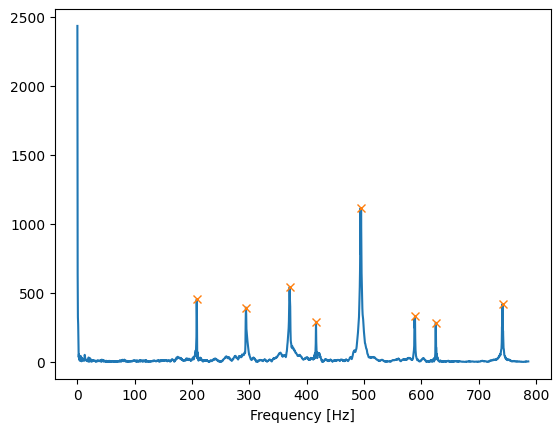

Harmonics: [208. 294. 370. 416. 494. 589. 625. 742.]


In [13]:
# Another example to check if method is working correctly
path = "../input/musical-instrument-chord-classification/Audio_Files/Minor/Minor_169.wav"

harmonics_2 = find_harmonics(path, print_peaks=True)
print("Harmonics: {}".format(np.round(harmonics_2)))

In [14]:
path = "/Users/xandi/AI_Projekt/input/musical-instrument-chord-classification/Audio_Files"
data = []
max_harm_length = 0 # i will keep track of max harmonic length for naming columns

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        foldername = os.path.basename(dirname)
        full_path = os.path.join(dirname, filename)
        freq_peaks = find_harmonics(full_path)
        
        max_harm_length = max(max_harm_length, len(freq_peaks))
        
        cur_data = [foldername, filename]
        cur_data.extend([freq_peaks.min(), freq_peaks.max(), len(freq_peaks)])
        cur_data.extend(freq_peaks)
        
        data.append(cur_data)

In [15]:
# Column Names for DataFrame:
cols = ["Chord Type", "File Name", "Min Harmonic", "Max Harmonic", "# of Harmonics"]
for i in range(max_harm_length):
    cols.append("Harmonic {}".format(i+1))

# Creating DataFrame
df = pd.DataFrame(data, columns=cols)
df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,# of Harmonics
